In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/dk/ht9wngxs4r51l9tbk0_y94000000gp/T/ipykernel_61207/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Natural Language Processing

## 3. Data cleaning
Now we are able to process data to analyze text, numbers and symbols for particular regular expressions that can be useful for data cleaning, representation, and decision making analyses. Let's start performing some data cleaning filtering

For this purpose we will first use the NLTK library characteristics (Natural Language Toolkit).


In [2]:
import math
import numpy as np


import nltk
#nltk.download()


## 3.1 Tokenizing text into bags of words

NLTK makes it easy to convert documents-as-strings into word-vectors, a process called tokenizing.




In [3]:
from nltk.tokenize import word_tokenize

raw_docs = ["Here are some very simple basic sentences.",
"They won't be very interesting, I'm afraid.",
"The point of these examples is to _learn how basic text cleaning works_ on *very simple* data."]


tokenized_docs = [word_tokenize(doc) for doc in raw_docs]
for doc in tokenized_docs:
    print(doc)

['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences', '.']
['They', 'wo', "n't", 'be', 'very', 'interesting', ',', 'I', "'m", 'afraid', '.']
['The', 'point', 'of', 'these', 'examples', 'is', 'to', '_learn', 'how', 'basic', 'text', 'cleaning', 'works_', 'on', '*', 'very', 'simple', '*', 'data', '.']


## 3.2 Removing punctuation

Punctuation can help with tokenizers, but once you've done that, there's no reason to keep it around. There are tons of ways to remove punctuation.

Let's review some useful functions

re.escape: Return string with all non-alphanumerics backslashed; this is useful if you want to match an arbitrary literal string that may have regular expression metacharacters in it.

In [4]:
import string
import re
#nltk.download('punkt')

print(string.punctuation)
print (re.escape(string.punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [5]:
pattern = re.compile('[%s]' % re.escape(string.punctuation)) 
tokenized_docs_no_punctuation = []
for sentence in tokenized_docs:
    new_sentence = []
    for token in sentence: 
        new_token = pattern.sub(u'', token) # Replace by an empty string
        if not new_token == u'':
            new_sentence.append(new_token) # Append only tokens which are not empty
    tokenized_docs_no_punctuation.append(new_sentence)
    
    print(sentence)
    print(new_sentence)
    print()

['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences', '.']
['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences']

['They', 'wo', "n't", 'be', 'very', 'interesting', ',', 'I', "'m", 'afraid', '.']
['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid']

['The', 'point', 'of', 'these', 'examples', 'is', 'to', '_learn', 'how', 'basic', 'text', 'cleaning', 'works_', 'on', '*', 'very', 'simple', '*', 'data', '.']
['The', 'point', 'of', 'these', 'examples', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data']



<strong>pattern.sub(repl, string, count=0, flags=0)</strong>
    
    
Return the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl. If the pattern isn’t found, string is returned unchanged.

## 3.3 Stemming and Lemmatizing

If you have taken linguistics, you may be familiar with morphology. This is the belief that words have a root form. If you want to get to the basic term meaning of the word, you can try applying a stemmer or lemmatizer.

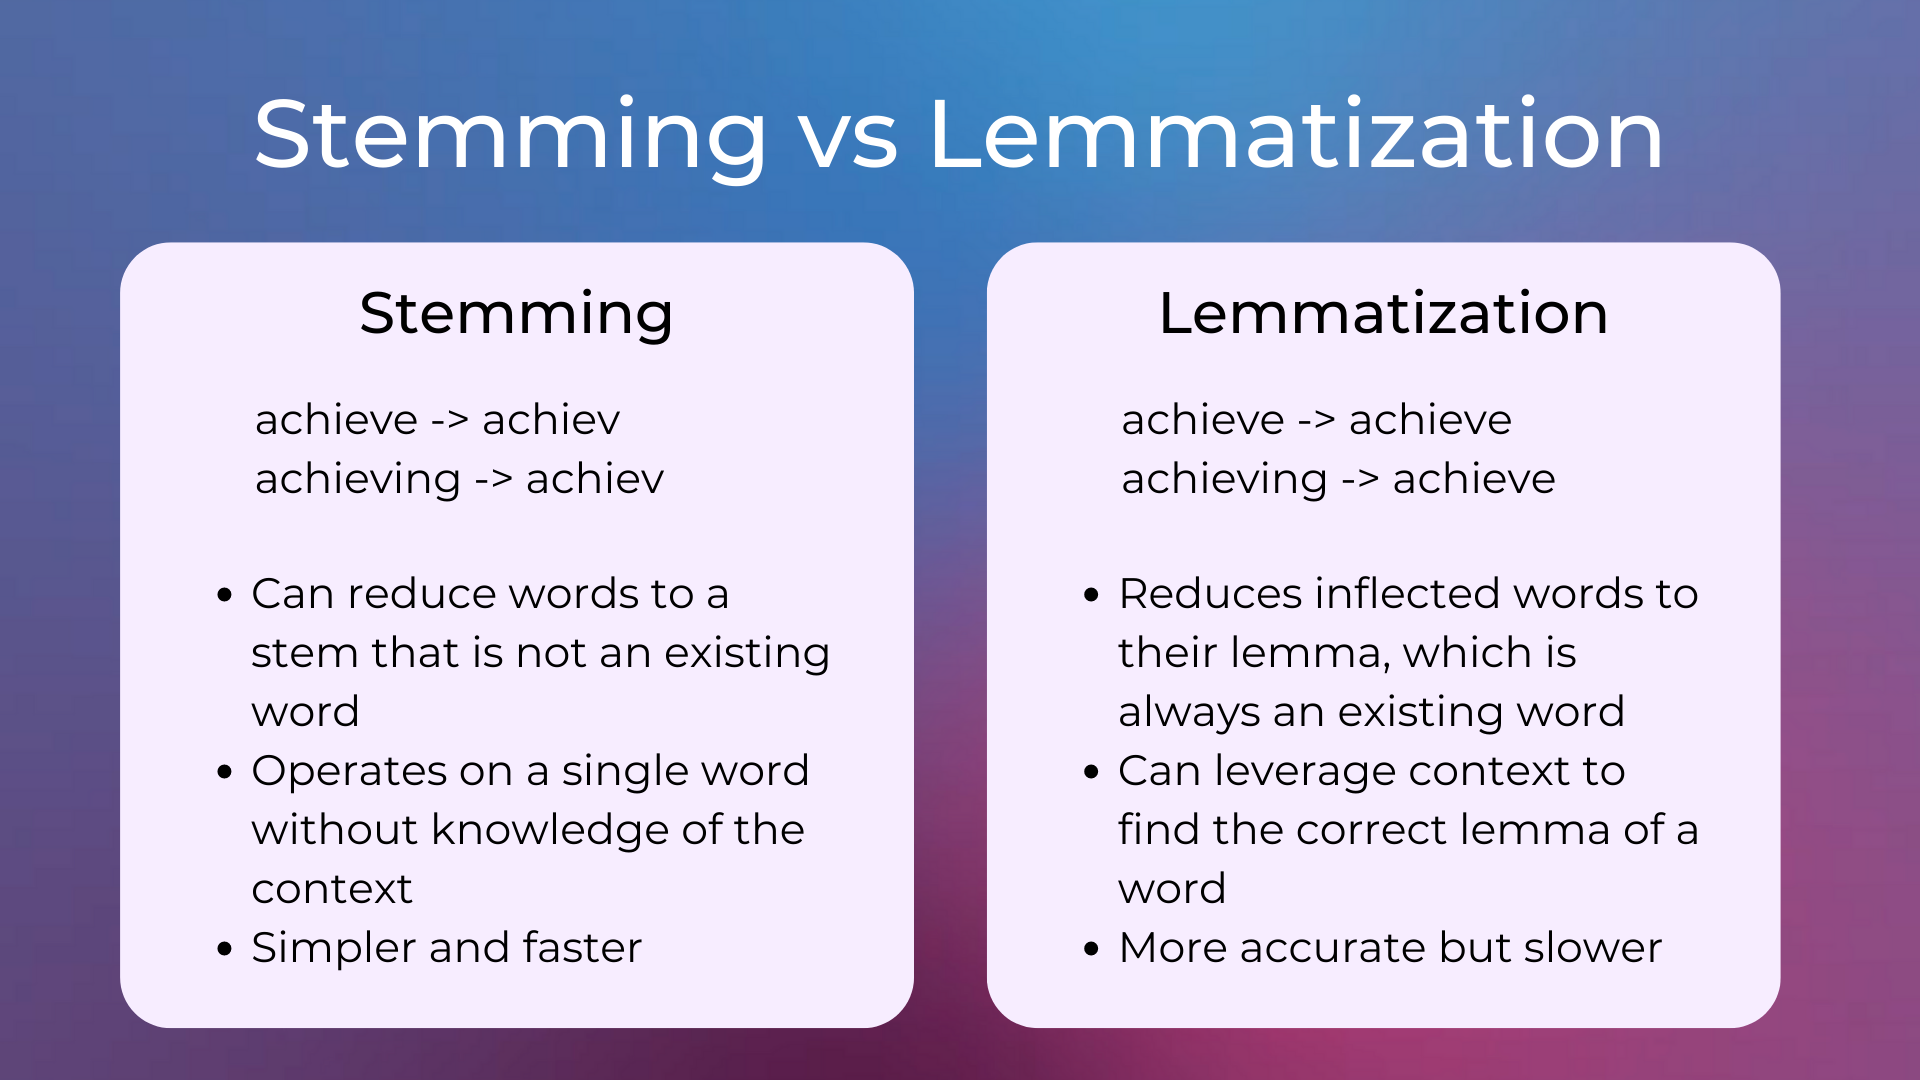


**Stemming** algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations.</li>
<p>
    
**Lemmatization**, on the other hand, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. </li>


In [6]:
# Try different steammer and lemmatizer methods

from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter   = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet_lemma  = WordNetLemmatizer()

words = ['cat','trouble','troubling','troubled','is','are','feet']
for word in words:
    print("---- ",word,"----")
    print('PS:',porter.stem(word))
    print('SS:',snowball.stem(word))
    print('WN:',wordnet_lemma.lemmatize(word))
    print('WN:',wordnet_lemma.lemmatize(word,pos="v"))
    print()

----  cat ----
PS: cat
SS: cat
WN: cat
WN: cat

----  trouble ----
PS: troubl
SS: troubl
WN: trouble
WN: trouble

----  troubling ----
PS: troubl
SS: troubl
WN: troubling
WN: trouble

----  troubled ----
PS: troubl
SS: troubl
WN: troubled
WN: trouble

----  is ----
PS: is
SS: is
WN: is
WN: be

----  are ----
PS: are
SS: are
WN: are
WN: be

----  feet ----
PS: feet
SS: feet
WN: foot
WN: feet



In [7]:
for doc in tokenized_docs_no_punctuation:
    final_doc = []
    for word in doc:
        final_doc.append(porter.stem(word))
        #final_doc.append(snowball.stem(word)) # requires 'corpora/wordnet' -> nltk.download()
        #final_doc.append(wordnet_lemma.lemmatize(word)) # requires 'corpora/wordnet' -> nltk.download()
    print()
    print('Before:',doc)
    print('After: ', final_doc)



Before: ['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences']
After:  ['here', 'are', 'some', 'veri', 'simpl', 'basic', 'sentenc']

Before: ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid']
After:  ['they', 'wo', 'nt', 'be', 'veri', 'interest', 'i', 'm', 'afraid']

Before: ['The', 'point', 'of', 'these', 'examples', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data']
After:  ['the', 'point', 'of', 'these', 'exampl', 'is', 'to', 'learn', 'how', 'basic', 'text', 'clean', 'work', 'on', 'veri', 'simpl', 'data']


In [8]:
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0]#.upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN) # returns the word type (Noun if we have not found)

# Trasform the documents using lemmatizer
for doc in tokenized_docs_no_punctuation:
    final_doc = []
    for word in doc:
        # we can improve the results if we know if the word is a noun/vern/adverb or adjective
        final_doc.append(wordnet_lemma.lemmatize(word,get_wordnet_pos(word))) # requires 'corpora/wordnet' -> nltk.download()

    print()
    print('Before:',doc)
    print('After: ', final_doc)
    


Before: ['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences']
After:  ['Here', 'be', 'some', 'very', 'simple', 'basic', 'sentence']

Before: ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid']
After:  ['They', 'wo', 'nt', 'be', 'very', 'interest', 'I', 'm', 'afraid']

Before: ['The', 'point', 'of', 'these', 'examples', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data']
After:  ['The', 'point', 'of', 'these', 'example', 'be', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'work', 'on', 'very', 'simple', 'data']
